**<h1> Лабораторная работа 2. Базовые манипуляции с изображениями (basic image manipulation with open_CV) </h1>**

## Цель

Научиться производить простые операции с изображениями без изменения их содержания в библиотеке OPenCV

<h2>Задачи</h2>


В этой лабораторной работе вы узнаете, как манипулировать изображениями, массивами изображений OpenCV. Вы узнаете, как копировать изображение. Мы рассмотрим переворачивание изображений и обрезку изображений. Вы также научитесь изменять пиксельные изображения; это позволит вам рисовать фигуры, писать текст и накладывать изображения поверх других изображений.

<ul>
     <li>Обработка изображений
         <ul>
             <li>Копирование изображений </li>
             <li>Переворачивание изображений </li>
             <li>Обрезка изображения </li>
             <li>Изменение определенных пикселей изображения </li>
             <li>Надписи и геометрические фигуры на изображении </li>

</ul>


***


Изображения для работы:

lenna.png

baboon.png

barbara.png  

Мы будем использовать эти импортированные библиотеки в лабораторной работе.


In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

## Копирование изображений


Если вы хотите переназначить массив другой переменной, вы должны использовать метод «копировать». Если мы не применим метод `copy()`, переменная будет указывать на то же место в памяти. Когда изменяем изображение, то лучше делать это не с исходником, а с его копией. Рассмотрим следующий массив:


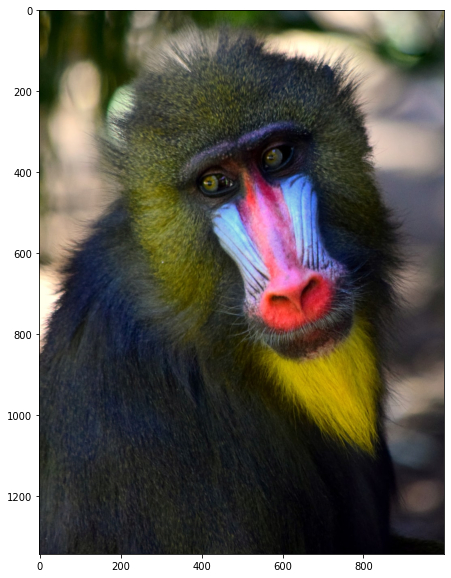

In [ ]:
baboon = cv2.imread("baboon.jpg")
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))
plt.show()

Чтобы копировать изображение в переменную B, используется функция \`copy()</coode>

In [ ]:
B = baboon.copy()

## Переворачивание изображений (Fliping Images)


Переворачивание изображений включает переупорядочение индекса пикселей таким образом, чтобы изменить ориентацию изображения. Рассмотрим следующее изображение:


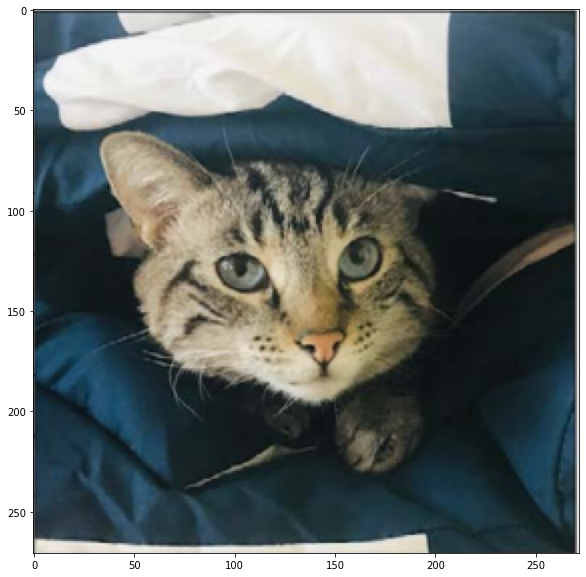

In [ ]:
image = cv2.imread("cat.png")
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

Мы можем привести его к массиву и найти его форму, т.е. ширину, высоту и количество каналов:


In [ ]:
width, height,C=image.shape
print('width, height,C',width, height,C)

width, height,C 271 272 3


Давайте перевернем изображение вручную, т.е. повернем его вертикально. Для этого мы не будем использовать функции. Во-первых, мы создаем массив равного размера битового изображения типа <code>np.uint8</code>.


In [ ]:
array_flip = np.zeros((width, height,C),dtype=np.uint8)

Мы назначаем первую строку пикселей исходного массива последней строке нового массива. Мы повторяем процесс для каждой строки, увеличивая номер строки для исходного массива и уменьшая индекс строки нового массива, соответственно назначая пиксели.


In [ ]:
for i,row in enumerate(image):
        array_flip[width-1-i,:,:]=row

Мы выводим на экран результаты


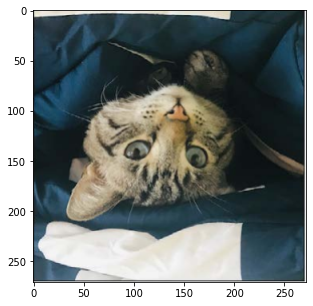

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(array_flip, cv2.COLOR_BGR2RGB))
plt.show()

<code>OpenCV</code> имеет несколько способов перевернуть изображение, мы можем использовать функцию <code>flip()</code>; у нас есть входной массив изображений. Параметр — <code>flipCode</code>.

это значение, указывающее, какой флип мы хотели бы выполнить;

<li><code>flipcode</code> = 0: отразить вертикально вокруг оси X</li>
<li><code>flipcode</code> > 0: перевернуть по горизонтали вокруг положительного значения оси Y</li>
<li><code>flipcode</code>&#60 0: отражение по вертикали и горизонтали, отражение по обеим осям с отрицательным значением</li>
Давайте применим различные <code>flipcode</code> в цикле:


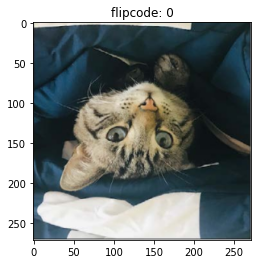

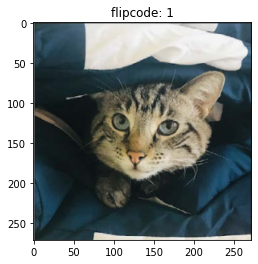

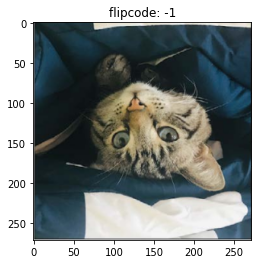

In [ ]:
for flipcode in [0,1,-1]:
    im_flip =  cv2.flip(image,flipcode )
    plt.imshow(cv2.cvtColor(im_flip,cv2.COLOR_BGR2RGB))
    plt.title("flipcode: "+str(flipcode))
    plt.show()

Мы также можем использовать функцию <code>rotate()</code>. Параметр представляет собой целое число, указывающее, какой вид флипа мы хотели бы выполнить.


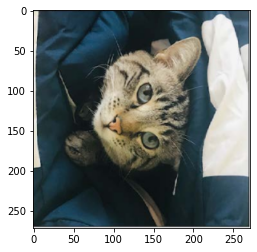

In [ ]:
im_flip = cv2.rotate(image,0)
plt.imshow(cv2.cvtColor(im_flip,cv2.COLOR_BGR2RGB))
plt.show()

Модуль OpenCV имеет встроенные атрибуты, описывающие тип переворота, значения — просто целые числа. Некоторые из них показаны в следующем <code>dict</code>:


In [ ]:
flip = {"ROTATE_90_CLOCKWISE":cv2.ROTATE_90_CLOCKWISE,"ROTATE_90_COUNTERCLOCKWISE":cv2.ROTATE_90_COUNTERCLOCKWISE,"ROTATE_180":cv2.ROTATE_180}

Мы видим, что значения словаря - это просто целые числа


In [ ]:
flip["ROTATE_90_CLOCKWISE"]

0

Мы можем построить каждый из выходов, используя разные значения параметров.


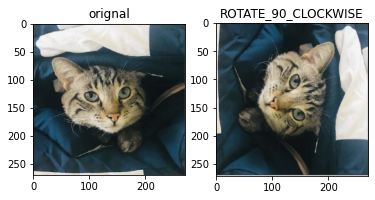

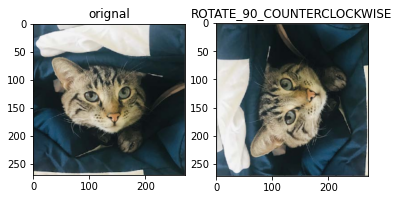

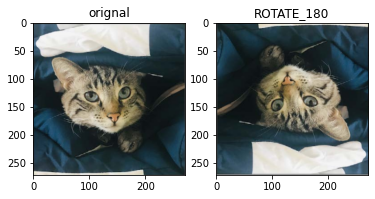

In [ ]:
for key, value in flip.items():
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("orignal")
    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(cv2.rotate(image,value), cv2.COLOR_BGR2RGB))
    plt.title(key)
    plt.show()

Поворот изображения на указанный угол происходит немного по-другому. Для этого используется матрица поворота M, в которой задаются координаты центра поворота, угол и параметры масштабирования.

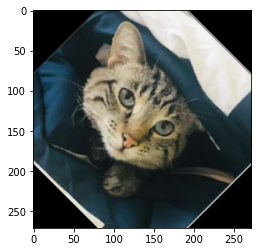

In [ ]:
h, w, _ = image.shape
center = (w//2, h//2)
M = cv2.getRotationMatrix2D(center, -45, 1.0)
im_flip = cv2.warpAffine(image, M, (w,h))
plt.imshow(cv2.cvtColor(im_flip,cv2.COLOR_BGR2RGB))
plt.show()

Несколько проще поворот можно осуществлять с помощью библиотеки `imutils`. Для этого нужно ее импортировать. Если вы работаете в Colab, то библиотека может быть не установлена. Для ее установки выполните: !pip install imutils

In [ ]:
import imutils

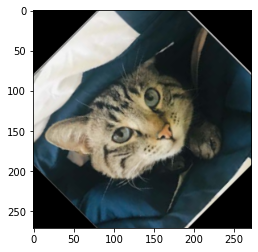

In [ ]:
im_flip = imutils.rotate(image, 45)
plt.imshow(cv2.cvtColor(im_flip,cv2.COLOR_BGR2RGB))
plt.show()

Поворот без обрезания частей картинки

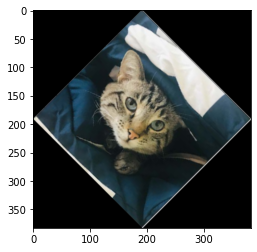

In [ ]:
im_flip = imutils.rotate_bound(image, 45)
plt.imshow(cv2.cvtColor(im_flip,cv2.COLOR_BGR2RGB))
plt.show()

## Обрезка изображения (Cropping an Image)


Обрезка — это «вырезание» части изображения и удаление всего остального; мы можем обрезать, используя массивы. Начнем с вертикальной обрезки; переменная <code>upper</code> — это первая строка, которую мы хотели бы включить в изображение, переменная <code>lower</code> — это последняя строка, которую мы хотели бы включить. Затем мы используем нарезку (slicing) для получения нового изображения. Представьте, что изображение - это карта, а мы вырезаем из нее конкретный кусок по координатам.

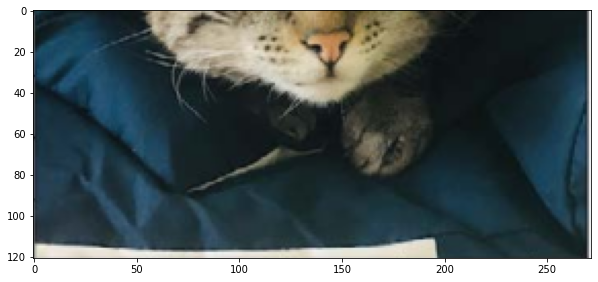

In [ ]:
upper = 150
lower = 400
crop_top = image[upper: lower,:,:]
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(crop_top, cv2.COLOR_BGR2RGB))
plt.show()

рассмотрим массив <code>crop_top</code>, мы также можем обрезать по горизонтали переменная right — это первый столбец, который мы хотели бы включить в изображение, переменная left — это последний столбец, который мы хотели бы включить в изображение.

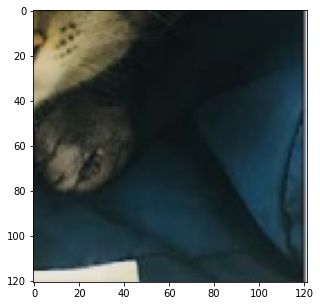

In [ ]:
left = 150
right = 400
crop_horizontal = crop_top[: ,left:right,:]
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(crop_horizontal, cv2.COLOR_BGR2RGB))
plt.show()

## Изменение определенных пикселей изображения (Changing Specific Image Pixels)


Мы можем изменить определенные пиксели изображения, используя индексацию массива; например, мы можем установить значения всех каналов (красного, зеленого, синего) в исходном изображении, которое мы обрезали, равными нулю:


In [ ]:
array_sq = np.copy(image)
array_sq[upper:lower,left:right,:] = 0

Мы можем сравнить результаты с начальным изображением.


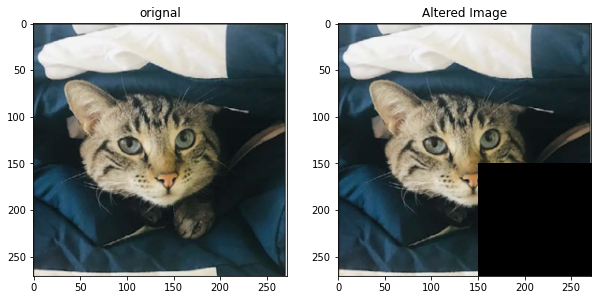

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.title("orignal")
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(array_sq,cv2.COLOR_BGR2RGB))
plt.title("Altered Image")
plt.show()

Мы также можем создавать фигуры и <code>OpenCV</code>, мы можем использовать метод <code>прямоугольник</code>. Параметр <code>pt1</code> — это левая верхняя координата прямоугольника: <code>(left,top)</code> или $(x\_0,y\_0)$, <code>pt2 </code> — нижняя правая координата <code>(right,lower) </code> или $(x\_1,y\_1)$. Параметр <code>color</code> представляет собой кортеж, представляющий интенсивность каждого канала <code>(синий, зеленый, красный)</code>. Также указывается толщина линии.

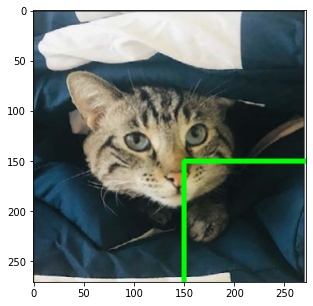

In [ ]:
start_point, end_point = (left, upper),(right, lower)
image_draw = np.copy(image)
cv2.rectangle(image_draw, pt1=start_point, pt2=end_point, color=(0, 255, 0), thickness=3)
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(image_draw, cv2.COLOR_BGR2RGB))
plt.show()

Рисование изображений с помощью OpenCV.
Для рисования фигур можно использовать встроенные возможности OpenCV.

`cv.ellipse` - эллипс

`cv.circle` - круг

In [ ]:
import cv2 as cv
import numpy as np

Создадим две функции, которые будут рисовать геометрические фигуры на изображении: эллипс и заполненный круг.

In [ ]:
W = 400
def my_ellipse(img, angle):
    thickness = 2
    line_type = 8
    cv.ellipse(img,
                (W // 2, W // 2),
                (W // 4, W // 16),
                angle,
                0,
                360,
                (255, 0, 0),
                thickness,
                line_type)

def my_filled_circle(img, center):
    thickness = -1
    line_type = 8
    cv.circle(img,
               center,
               W // 32,
               (0, 0, 255),
               thickness,
               line_type)

А потом с помощью этого нарисуем рисунок. Создадим пустое черное изображение размером 400 х 400 пикселей.

In [ ]:
atom_window = "Drawing 1: Atom"
# Create black empty images
size = W, W, 3
atom_image = np.zeros(size, dtype=np.uint8)

Используем созданную выше функцию `my_ellipse` и `my_filled_circle`, поместив в качестве аргументов параметры угла наклона эллипса и центра круга

In [ ]:
# 1.a. Creating ellipses
my_ellipse(atom_image, 90)
my_ellipse(atom_image, 0)
my_ellipse(atom_image, 45)
my_ellipse(atom_image, -45)
# 1.b. Creating circles
my_filled_circle(atom_image, (W // 2, W // 2))

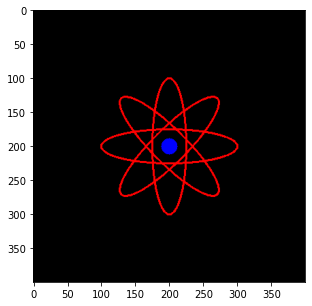

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(atom_image)
plt.show()

Мы можем наложить текст на изображение с помощью функции <code>putText</code> со следующими значениями параметров:


<li><code>img</code>: массив изображений </li>
<li><code>text</code>: текстовая строка для наложения</li>
<li><code>org</code>: нижний левый угол текстовой строки на изображении.</li>
<li><code>fontFace</code>: тип шрифта </li>
<li><code>fontScale</code>: масштаб шрифта</li>
<li><code>color</code>: цвет текста</li>
<li><code>thickness</code>: толщина линий, используемых для рисования текста.</li>
<li><code>lineType:</code> тип линии</li>

Текст накладывается на оригинал изображения, поэтому следует сначала сделать копию.

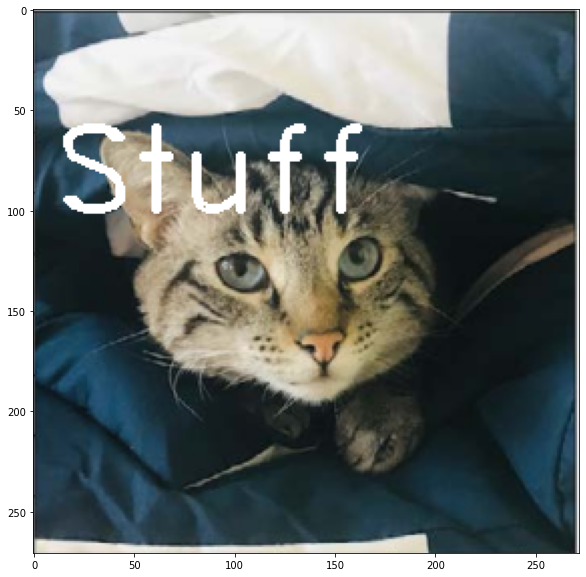

In [ ]:
image_draw=cv2.putText(img=image,text='Stuff',org=(10,100),color=(255,255,255),fontFace=2,fontScale=2,thickness=2)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image_draw,cv2.COLOR_BGR2RGB))
plt.show()

Мы можем написать текст на изображении, подобрав соответсвующие параметры. Желательно наносить текст на копию изображения, поскольку текст записывается на нем.

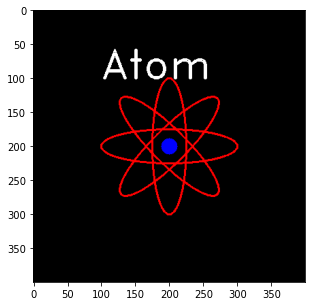

In [ ]:
image_draw=cv2.putText(img=atom_image,text='Atom',org=(100,100),color=(255,255,255),fontFace=2,fontScale=2,thickness=2)
plt.figure(figsize=(5,5))
plt.imshow(atom_image)
plt.show()

### Перемещение части одного изображения на другое

Создаем черное изображение размером 500 на 500 пикселей

In [ ]:
array_zero = np.zeros((500, 500, 3),dtype=np.uint8)

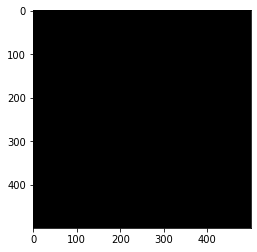

In [ ]:
plt.imshow(array_zero)
plt.show()

In [ ]:
baboon = cv2.imread("baboon.jpg")

Присваиваем вырезанную часть изображения источника `baboon` такой же части изображения цели `array_zero`.

In [ ]:
array_zero[200:300, 100:400] = baboon[200:300, 100:400]

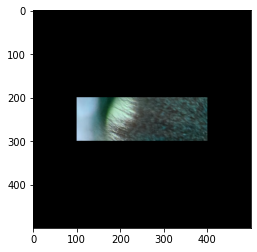

In [ ]:
plt.imshow(array_zero)
plt.show()

### Задание 1:

**Каждый пункт задания нужно выполнять в отдельных ячейках блокнота, не связанных с предыдущими пунктами заданий. Это делается путем вставки новой ячейки с кодом. Над ячейкой с кодом нужно вставить тектовую ячейку с номером выполняемого задания.**

Для выполнения работы используйте любое изображение, которое вам нравится, за исключением изображений, использованных в работе. Изображения у студентов не должны повторяться.

1. Выпишите все непонятные вам функции (конструкции языка Python) из этой лабораторной работы. Кратко напишите, что они означают.

3. Откройте изображение и создайте объект изображения OpenCV с именем `im`,

4. преобразуйте изображение из формата BGR в формат RGB,

5. отразите `im` по вертикали (поверните на 90) вокруг оси x и создайте изображение с именем `im_flip`,

6. зеркально отразите `im`, перевернув его горизонтально вокруг оси Y и создайте изображение с именем `im_mirror`,

7. нарисуйте (выведите на экран) оба изображения.

8. Затем обведите какой-либо элемент начального изображения фигурой "прямоугольник".

9. Над ним напишите наименование обведенного объекта.

10. После этого вырежьте обведенный объект,

11. создайте новую картинку и вставьте его туда.

12. Выведите на экран 2 изображения рядом - исходное и вырезанное.

13. Затем поверните вырезанное изображение на угол 60 градусов без обрезания краев.

In [ ]:
# write your code here


# Контрольные вопросы

1. Функция flip() библиотеки OpenCV. Принцип работы.
2. Поворот изображения на указанный угол
3. Вырезание части изображения
4. Рисование фигур на изображении с помощью OpenCV
5. Создание текстовых написей на изображении
6. Создание "пустого" изображения